In [18]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [19]:
class AgentState(TypedDict):
    name: str
    age: str
    skills:List[str]
    final:str

In [20]:
def personalize_node(state:AgentState) -> AgentState:
    """This is first node of the sequence"""
    state['final'] = f"{state['name']}, welcome to the system!"
    return state
def age_node(state:AgentState) ->AgentState:
    """This is second node of the sequence"""
    state['final'] = state['final'] + f" You are {state['age']} years old!"
    return state
def skills_node(state:AgentState) ->AgentState:
    """This is third node of the sequence"""
    state['final'] = state['final'] + " You have skills in " +", ".join(state['skills'])
    return state

In [21]:
graph = StateGraph(AgentState)
graph.add_node("namer",personalize_node)
graph.add_node("ager",age_node)
graph.add_edge("namer","ager")

graph.add_node("skiller",skills_node)
graph.add_edge("ager","skiller")

graph.set_entry_point("namer")
graph.set_finish_point("skiller")
app=graph.compile()

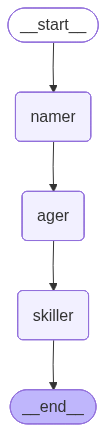

In [22]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [23]:
ans = app.invoke({'name':"Linda","age":31,"skills":["Python","Machine Learning","LangGraph"]})

In [24]:
ans['final']

'Linda, welcome to the system! You are 31 years old! You have skills in Python, Machine Learning, LangGraph'